The first thing we have to do is import some libraries and datasets. You can get the dataset from here: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

Now we have to import some libraries :

After that, we have to read the dataset using pandas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

df = pd.read_csv('Bank Customer Churn Prediction.csv')
print(df.head())

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


The first thing we have to do in Exploratory Data Analysis is checked if there are null values in the dataset.

In [2]:
df.isnull().head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [28]:
#Checking Data types
df.dtypes

customer_id           int64
credit_score          int64
country               int64
gender                int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

churn
0    7963
1    2037
Name: count, dtype: int64


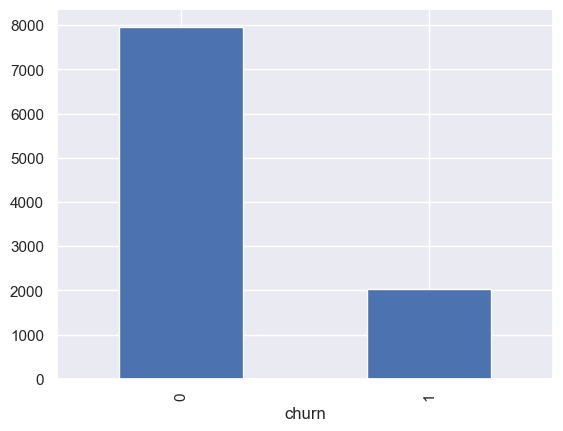

In [29]:
#Counting 1 and 0 Value in Churn column
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["churn"].map(lambda x: color_wheel.get(x + 1))
print(df.churn.value_counts())
p=df.churn.value_counts().plot(kind="bar")

In [6]:
#Change value in country column
df['country'] = df['country'].replace(['Germany'],'0')
df['country'] = df['country'].replace(['France'],'1')
df['country'] = df['country'].replace(['Spain'],'2')
#Change value in gender column
df['gender'] = df['gender'].replace(['Female'],'0')
df['gender'] = df['gender'].replace(['Male'],'1')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#convert object data types column to integer
df['country'] = pd.to_numeric(df['country'])
df['gender'] = pd.to_numeric(df['gender'])
df.dtypes

customer_id           int64
credit_score          int64
country               int64
gender                int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [8]:
#Remove customer_id column
df2 = df.drop('customer_id', axis=1)
df2.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

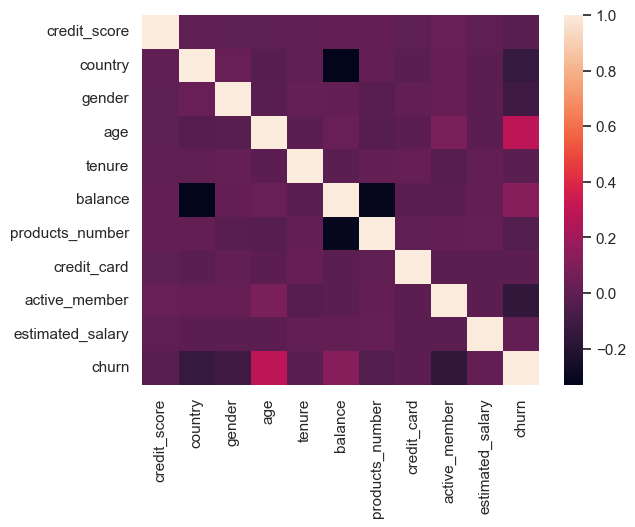

In [9]:
sns.heatmap(df2.corr(), fmt='.2g')

Build Machine Learning Model

In [11]:
X = df2.drop('churn', axis=1)
y = df2['churn']
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)

Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 78.14999999999999 %


Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 86.5 %


Support Vector Machine

In [15]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 79.45 %


XGBoost

In [19]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 85.15 %


Visualize Random Forest and XGBoost Algorithm because Random Forest and XGBoost Algorithm have the Best Accuracy

In [21]:
#importing classification report and confusion matrix from sklearn

from sklearn.metrics import classification_report, confusion_matrix

Random Forest

In [22]:
y_pred = rfc.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1589
           1       0.78      0.48      0.59       411

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.86      0.85      2000



Text(0.5, 1.0, 'Accuracy Score: 0.865')

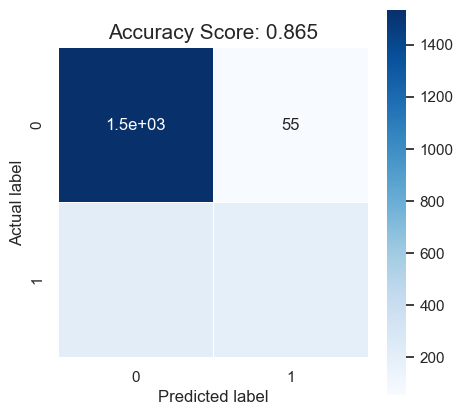

In [23]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

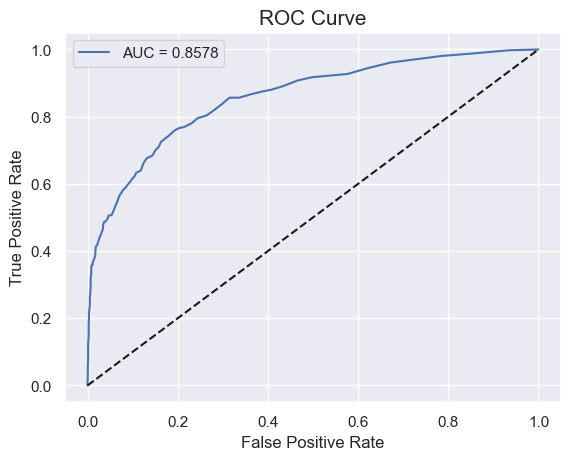

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

XGBoost

In [25]:
y_pred = xgb_model.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1589
           1       0.71      0.47      0.57       411

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(0.5, 1.0, 'Accuracy Score: 0.8515')

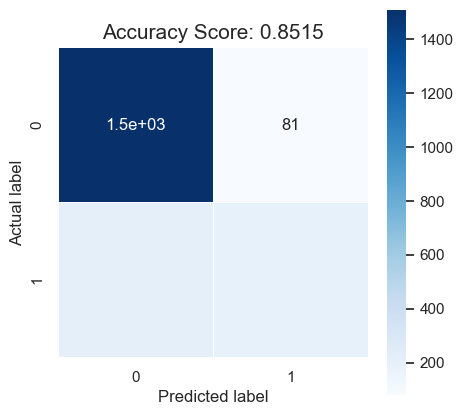

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

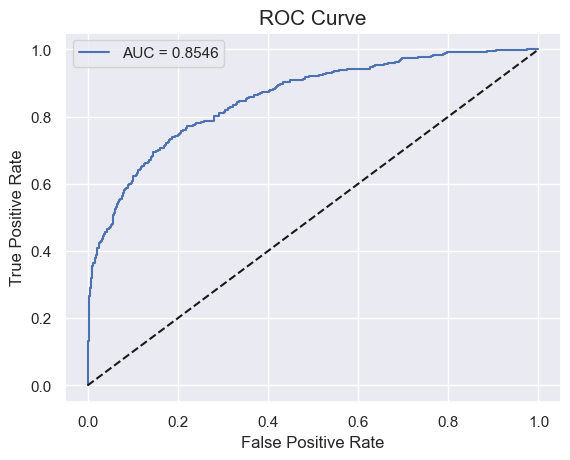

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb_model.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

The churn variable has imbalanced data. So, the solution to handle imbalanced data are :

Resample Training set
Use K-fold Cross-Validation in the Right Way
Ensemble Different Resampled Datasets
We have to change the value in the Country and Gender columns so the Machine Learning model can read and predict the dataset; after changing the value, we have to change the data types on the Country and Gender column from string to integer because XGBoost Machine Learning Model cannot read string data types even though the value in the column is number.

Lastly, XGBoost and Random Forest are the best algorithms to predict Bank Customer Churn since they have the highest accuracy (86,85% and 86.45%). Random Forest and XGBoost have perfect AUC Scores. They have 0.8731 and 0.8600 AUC Scores.